In [2]:
import os
import requests
import pandas as pd

In [48]:
x = 'pizza_19'
url = 'https://cdn.nhathuoclongchau.com.vn/unsafe/800x0/filters:quality(95)/https://cms-prod.s3-sgn09.fptcloud.com/cach_lam_banh_pizza_thom_ngon_chuan_nha_hang_2_43d4f180fd.png'
path = f"data/images/{x}.jpg"

response = requests.get(url, timeout=10)  # Thêm timeout để kiểm tra lỗi kết nối
response.raise_for_status()  # Kiểm tra lỗi HTTP

with open(path, 'wb') as img_file:
    img_file.write(response.content)

save food table

In [19]:
import pandas as pd

df = pd.read_csv(r"data\List dishes.csv")
df.iloc[:, 2]

0       Banh bao
1       Banh beo
2      Banh canh
3     Banh chung
4     Banh crepe
         ...    
79      Tokbokki
80          Trau
81      Vit quay
82       Wontons
83           Xoi
Name: Name, Length: 84, dtype: object

In [20]:
import mysql.connector

connection = mysql.connector.connect(
    host="localhost",
      user="root",
      password="",
      database="food_img_search"
    )

cursor = connection.cursor()

In [21]:
for index, row in df.iterrows():
    dish_name = row.iloc[2]  # Access the third column of the row
    cursor.execute('INSERT INTO food (name) VALUES (%s)', (dish_name,))

# Commit the transaction to save the changes
connection.commit()

cursor.close()
connection.close()

check test_img

In [2]:
import os
from PIL import Image

data_dir = r'test_img'

invalid = []

# Lặp qua tất cả các tệp trong thư mục dữ liệu
for root, dirs, files in os.walk(data_dir):
    for file in files:
        file_path = os.path.join(root, file)
        try:
            # Mở và kiểm tra hình ảnh
            img = Image.open(file_path)
            img.verify()  # Kiểm tra tính hợp lệ của hình ảnh
        except (IOError, SyntaxError) as e:
            # Nếu có lỗi, thêm tệp không hợp lệ vào danh sách
            print('Invalid file:', file_path)
            invalid.append(file_path)

list_test = []
for root, dirs, files in os.walk(data_dir):
    dirs.sort()
    files.sort()
    for file in files:
        file_path = os.path.join(root, file)
        if file_path not in invalid:
            list_test.append(file_path)

list_test

['test_img\\1.JPG',
 'test_img\\1725297574388.JPG',
 'test_img\\1725297576209.JPG',
 'test_img\\1725345617221.JPG',
 'test_img\\1725345629098.JPG',
 'test_img\\2.JPG',
 'test_img\\3.JPG',
 'test_img\\4.JPG',
 'test_img\\5.JPG',
 'test_img\\6.JPG',
 'test_img\\IMG_3627.JPG',
 'test_img\\IMG_3630.JPG',
 'test_img\\IMG_3643.JPG',
 'test_img\\IMG_3645.JPG',
 'test_img\\IMG_3666.JPG',
 'test_img\\IMG_3672.JPG',
 'test_img\\IMG_3676.JPG',
 'test_img\\IMG_3677.JPG',
 'test_img\\test1.jpg',
 'test_img\\test10.JPG',
 'test_img\\test2.JPG',
 'test_img\\test3.JPG',
 'test_img\\test4.JPG',
 'test_img\\test5.JPG',
 'test_img\\test6.JPG',
 'test_img\\test7.jpg',
 'test_img\\test8.JPG',
 'test_img\\test9.JPG']

Cosine

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.preprocessing.image import DirectoryIterator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import cosine_similarity
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

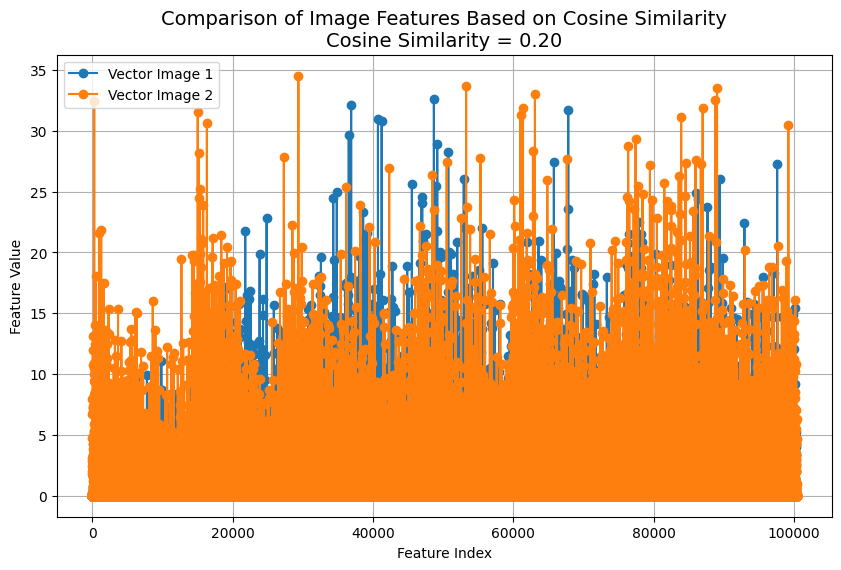

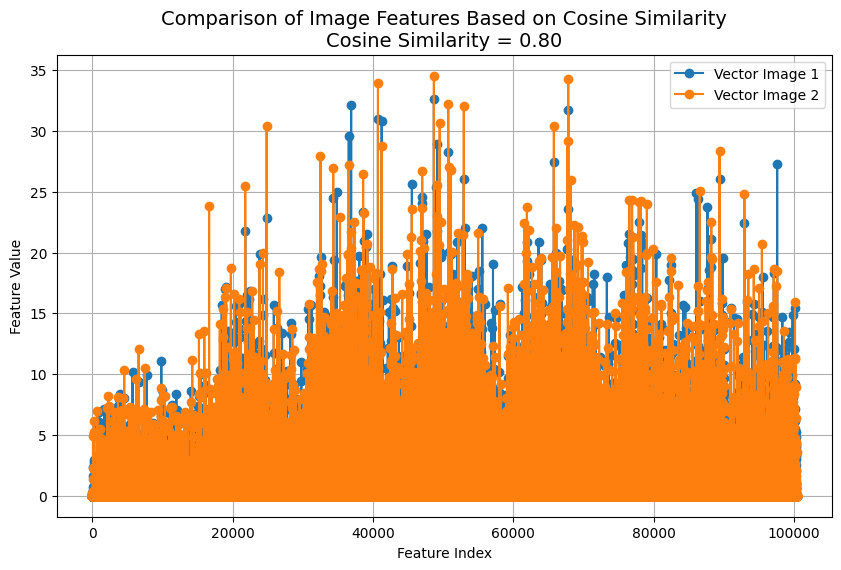

In [3]:

# Khởi tạo mô hình ResNet50 và bỏ đi lớp fully connected (top layer)
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Trích xuất đặc trưng từ mô hình ResNet50
def extract_features(image_path):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array, verbose=0)
    return features.flatten()

def plot_cosine_2img(i1, i2):
    # Trích xuất vector đặc trưng của hai ảnh
    vector_img1 = np.array(extract_features(i1))
    vector_img2 = np.array(extract_features(i2))

    # Tính Cosine Similarity giữa hai vector
    cosine = cosine_similarity([vector_img1], [vector_img2])[0][0]

    # Vẽ biểu đồ đường thẳng so sánh các đặc trưng
    plt.figure(figsize=(10, 6))
    plt.plot(vector_img1, label='Vector Image 1', marker ='o')
    plt.plot(vector_img2, label='Vector Image 2', marker ='o')

    plt.title(f'Comparison of Image Features Based on Cosine Similarity\nCosine Similarity = {cosine:.2f}', fontsize=14)
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Value')
    plt.legend()
    plt.grid(True)
    plt.show()

img1 = r'data\images\banh_mi_92.jpg'
img2 = r'test\1.jpg'
img3 = r'test\10.jpg'
plot_cosine_2img(img1, img2)
plot_cosine_2img(img1,img3)
